In [1]:
import torch, matplotlib.pyplot as plt

In [2]:
torch.manual_seed(0)

# 1. Make synthetic data
x = torch.linspace(-3, 3, 1000).unsqueeze(1)
y = 0.1*(-x**3 + 5 * x**2 - x + 2 + 0.2 * torch.randn_like(x)) + 2 * torch.sin(10 * x)

# Split into train/val
train_mask = torch.rand(len(x)) < 0.8
test_mask = ~train_mask
x_train, y_train = x[train_mask], y[train_mask]
x_val, y_val     = x[test_mask], y[test_mask]

In [3]:
hidden_dim = 64

# 2. Define a small model
model = torch.nn.Sequential(
    torch.nn.Linear(1, hidden_dim),
    torch.nn.Tanh(),
    torch.nn.Linear(hidden_dim, hidden_dim),
    torch.nn.Tanh(),
    torch.nn.Linear(hidden_dim, hidden_dim),
    torch.nn.Tanh(),
    torch.nn.Linear(hidden_dim, hidden_dim),
    torch.nn.Tanh(),
    torch.nn.Linear(hidden_dim, 1)
)

In [4]:
loss_fn = torch.nn.MSELoss()
opt = torch.optim.AdamW(model.parameters(), lr=1e-3)

In [5]:
# 3. Train loop
train_losses, val_losses = [], []
for epoch in range(10000):
    # forward
    y_pred = model(x_train)
    loss = loss_fn(y_pred, y_train)
    # backward
    opt.zero_grad(); loss.backward(); opt.step()

    # validation
    with torch.no_grad():
        val_loss = loss_fn(model(x_val), y_val)
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    if epoch % 10 == 0:
      print(f"epoch {epoch:3d}: train={loss.item():.4f}  val={val_loss.item():.4f}")

epoch   0: train=7.4877  val=6.3134
epoch  10: train=5.1926  val=4.8936
epoch  20: train=4.7056  val=4.6413
epoch  30: train=3.9334  val=3.7777
epoch  40: train=3.0067  val=3.0094
epoch  50: train=2.5734  val=2.6099
epoch  60: train=2.3798  val=2.3372
epoch  70: train=2.2870  val=2.2355
epoch  80: train=2.2140  val=2.1505
epoch  90: train=2.1623  val=2.1210
epoch 100: train=2.1257  val=2.0851
epoch 110: train=2.0994  val=2.0755
epoch 120: train=2.0808  val=2.0701
epoch 130: train=2.0677  val=2.0725
epoch 140: train=2.0585  val=2.0706
epoch 150: train=2.0519  val=2.0723
epoch 160: train=2.0469  val=2.0719
epoch 170: train=2.0428  val=2.0710
epoch 180: train=2.0392  val=2.0689
epoch 190: train=2.0359  val=2.0661
epoch 200: train=2.0328  val=2.0633
epoch 210: train=2.0298  val=2.0605
epoch 220: train=2.0268  val=2.0577
epoch 230: train=2.0238  val=2.0549
epoch 240: train=2.0207  val=2.0519
epoch 250: train=2.0175  val=2.0489
epoch 260: train=2.0141  val=2.0457
epoch 270: train=2.0104  val

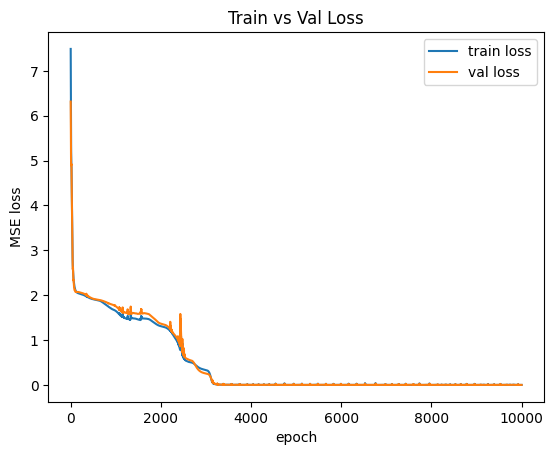

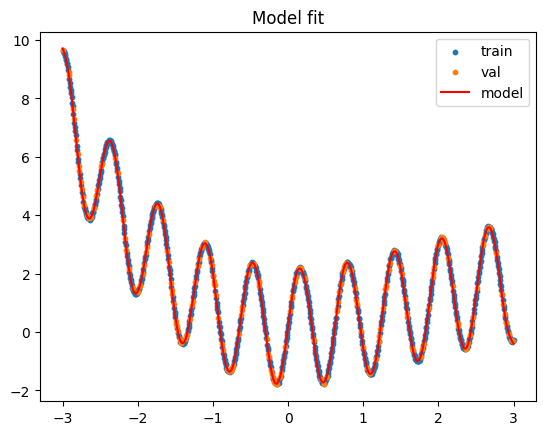

In [6]:
# 4. Plot training curve
plt.plot(train_losses, label="train loss")
plt.plot(val_losses, label="val loss")
plt.legend(); plt.xlabel("epoch"); plt.ylabel("MSE loss")
plt.title("Train vs Val Loss"); plt.show()

# 5. Visualize fit
with torch.no_grad():
    plt.scatter(x_train, y_train, s=10, label="train")
    plt.scatter(x_val, y_val, s=10, label="val")
    plt.plot(x, model(x).detach(), color="red", label="model")
    plt.legend(); plt.title("Model fit"); plt.show()